In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置字体为 SimHei（黑体）
font = FontProperties(fname="SimHei.ttf")



In [2]:
from pylab import mpl
 
# 设置中文显示字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]

In [3]:
filename = 'hy2023.xlsx'
#sheet_name = '2023年'
df = pd.read_excel(filename)


In [4]:
df.head()

,订单编号,SKU型号,订单金额,订单地址,订单提交时间,订单渠道,订单渠道1
0,5.051287e+18,\tR-0,129.0,无锡市,2023-03-31 00:12:31,赵老师带娃日志,赵老师带娃日志(早上8:30播）
1,5.050892e+18,\tR-0,129.0,西安市,2023-03-29 22:10:19,年高妈-早教玩,年高妈-早教玩具育儿
2,5.050416e+18,\tR-7-8,749.0,杭州市,2023-03-28 16:36:53,我叫林霹雳,我叫林霹雳
3,5.049971e+18,\tR-1-2-3-4-5-6-7-8,2599.0,济源市,2023-03-27 11:44:56,年高妈-早教玩,年高妈-早教玩具育儿
4,5.048561e+18,\tR-0,99.0,常州市,2023-03-23 16:12:38,我叫林霹雳,我叫林霹雳


In [ ]:
#def slice_text(text):
    #return text[:7]

In [ ]:
#df["订单渠道"] = df["订单渠道1"].apply(slice_text)

In [ ]:
#output_file = 'hy2022.xlsx'
#df.to_excel(output_file,index=False, engine='openpyxl')

In [5]:
#计算不同渠道的订单数量和销售额
channel_summary = df.groupby('订单渠道').agg({
    '订单编号': 'count',
    '订单金额': 'sum'
}).rename(columns={
    '订单编号': '订单数量',
    '订单金额': '销售额'
})

channel_summary['订单数量占比'] = channel_summary['订单数量'] / channel_summary['订单数量'].sum()
channel_summary['销售额占比'] = channel_summary['销售额'] / channel_summary['销售额'].sum()
#channel_summary['销量占比'] = channel_summary['销量'] / channel_summary['销量'].sum()


/var/folders/yl/16z7t59n3nz56fy1pt308ysw0000gn/T/ipykernel_7973/2085247583.py:16: UserWarning: Glyph 8226 (\N{BULLET}) missing from current font.
  plt.tight_layout()
/var/folders/yl/16z7t59n3nz56fy1pt308ysw0000gn/T/ipykernel_7973/2085247583.py:16: UserWarning: Glyph 127803 (\N{SUNFLOWER}) missing from current font.
  plt.tight_layout()
/var/folders/yl/16z7t59n3nz56fy1pt308ysw0000gn/T/ipykernel_7973/2085247583.py:16: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from current font.
  plt.tight_layout()
/Users/Jameszhou/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8226 (\N{BULLET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Jameszhou/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127803 (\N{SUNFLOWER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Jameszhou/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151

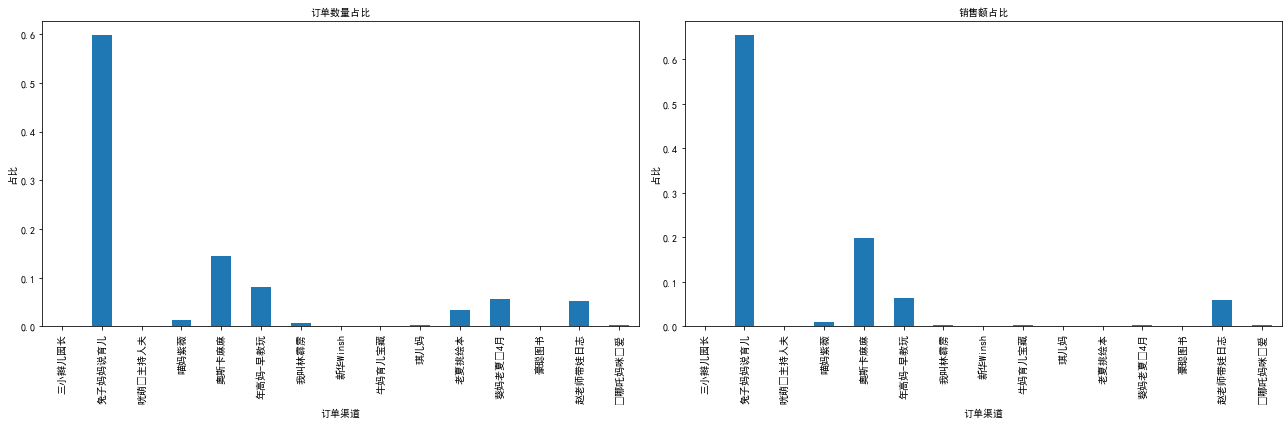

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 订单数量占比
channel_summary['订单数量占比'].plot(kind='bar', ax=axes[0])
axes[0].set_title('订单数量占比', fontproperties=font)
axes[0].set_xlabel('订单渠道', fontproperties=font)
axes[0].set_ylabel('占比', fontproperties=font)

# 销售额占比
channel_summary['销售额占比'].plot(kind='bar', ax=axes[1])
axes[1].set_title('销售额占比', fontproperties=font)
axes[1].set_xlabel('订单渠道', fontproperties=font)
axes[1].set_ylabel('占比', fontproperties=font)


plt.tight_layout()
plt.show()

In [7]:
#分析不同SKU的销售额占比
sku_sales = df.groupby('SKU型号')['订单金额'].sum()

In [8]:
total_sales = sku_sales.sum()
sku_sales_contribution = sku_sales / total_sales

/var/folders/yl/16z7t59n3nz56fy1pt308ysw0000gn/T/ipykernel_7973/2173120670.py:8: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/Users/Jameszhou/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


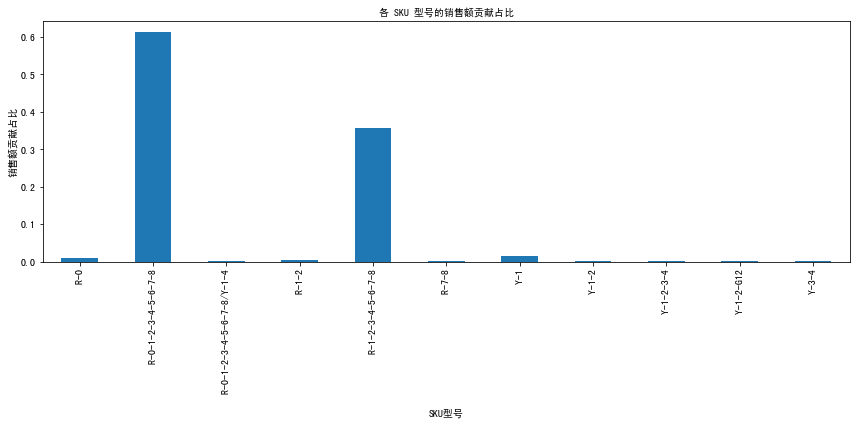

In [9]:
plt.figure(figsize=(12, 6))
sku_sales_contribution.plot(kind='bar')
plt.title('各 SKU 型号的销售额贡献占比', fontproperties=font)
plt.xlabel('SKU型号', fontproperties=font)
plt.ylabel('销售额贡献占比', fontproperties=font)
plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)
plt.tight_layout()
plt.show()

In [10]:
#分析不同订单地址的订单金额
region_sales = df.groupby('订单地址')['订单金额'].sum().sort_values(ascending=False)


In [11]:
top_regions = region_sales[:5].index  # 选择销售额最高的前五个地区
top_regions_df = df[df['订单地址'].isin(top_regions)]  # 筛选出这些地区的订单数据


/var/folders/yl/16z7t59n3nz56fy1pt308ysw0000gn/T/ipykernel_7973/4077279432.py:14: UserWarning: Glyph 127803 (\N{SUNFLOWER}) missing from current font.
  plt.tight_layout()
/Users/Jameszhou/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127803 (\N{SUNFLOWER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


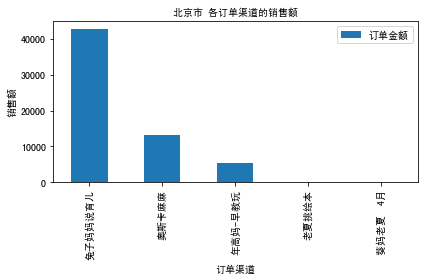

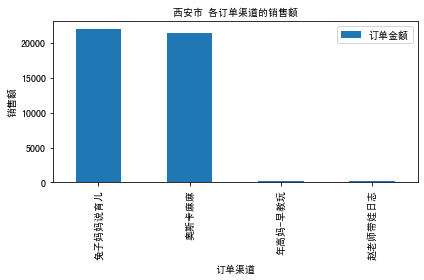

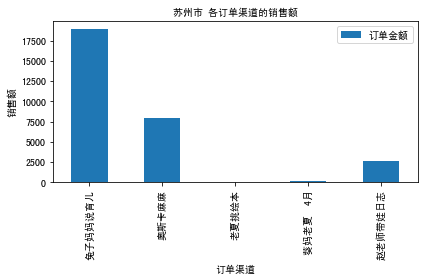

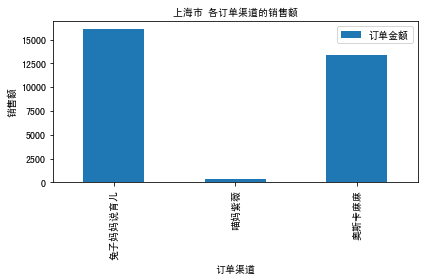

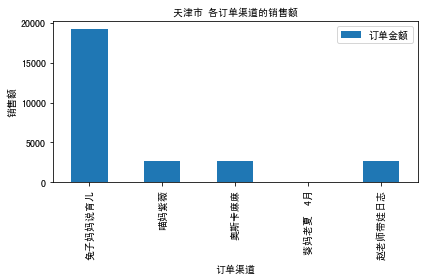

/var/folders/yl/16z7t59n3nz56fy1pt308ysw0000gn/T/ipykernel_7973/4077279432.py:30: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/Users/Jameszhou/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


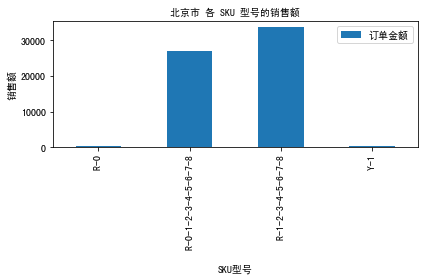

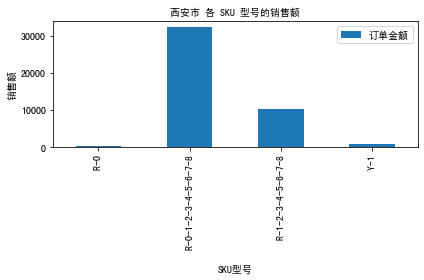

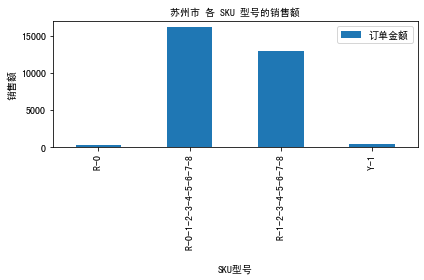

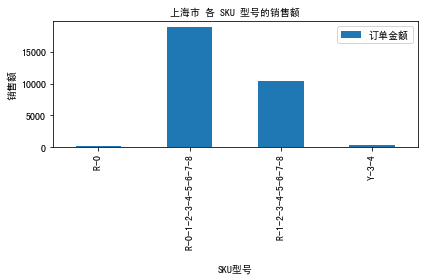

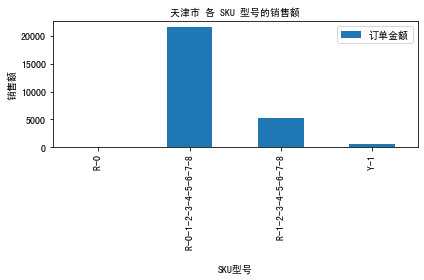

In [12]:
# 分析这些地区的订单渠道
channel_summary = top_regions_df.groupby(['订单地址', '订单渠道']).agg({
    '订单编号': 'count',
    '订单金额': 'sum',
}).reset_index()
for region in top_regions:
    region_data = channel_summary[channel_summary['订单地址'] == region]
    region_data.plot(kind='bar', x='订单渠道', y='订单金额')
    plt.title(f'{region} 各订单渠道的销售额', fontproperties=font)
    plt.xlabel('订单渠道', fontproperties=font)
    plt.ylabel('销售额', fontproperties=font)
    plt.xticks(fontproperties=font)
    plt.yticks(fontproperties=font)
    plt.tight_layout()
    plt.show()

# 分析这些地区的 SKU 型号
sku_summary = top_regions_df.groupby(['订单地址', 'SKU型号']).agg({
    '订单编号': 'count',
    '订单金额': 'sum',
}).reset_index()
for region in top_regions:
    region_data = sku_summary[sku_summary['订单地址'] == region]
    region_data.plot(kind='bar', x='SKU型号', y='订单金额')
    plt.title(f'{region} 各 SKU 型号的销售额', fontproperties=font)
    plt.xlabel('SKU型号', fontproperties=font)
    plt.ylabel('销售额', fontproperties=font)
    plt.xticks(fontproperties=font)
    plt.yticks(fontproperties=font)
    plt.tight_layout()
    plt.show()


In [13]:
#分析【兔子妈妈说育儿】渠道的地址分布

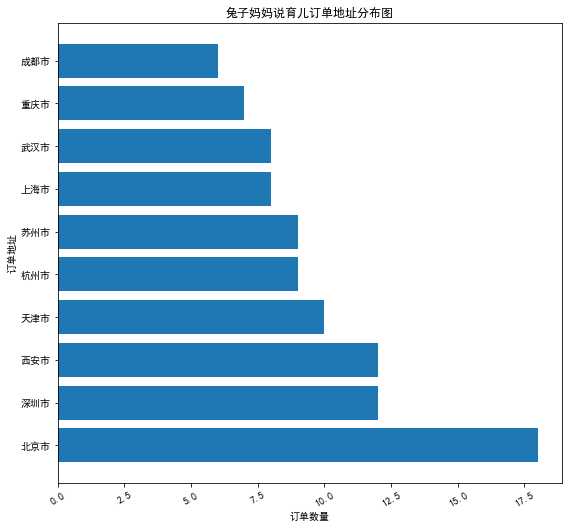

In [14]:
# 设置渠道名称
channel = "兔子妈妈说育儿"

# 提取特定渠道的订单地址数据
channel_data = df.loc[df['订单渠道'] == channel]['订单地址']

# 统计出现次数最多的前10个订单地址
address_counts = channel_data.value_counts().nlargest(10)

# 创建一个水平柱状图，展示每个订单地址的出现次数
fig, ax = plt.subplots(figsize=(10, 8))
plt.barh(address_counts.index, address_counts.values)

# 设定图表标题和标签等
plt.title(f"{channel}订单地址分布图")
plt.xlabel("订单数量")
plt.ylabel("订单地址")
plt.xticks(rotation=30) # x轴标签旋转30度，使其更加紧凑

# 调整子图间距，以便在图标中显示更多的订单地址
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9)

# 展示图表
plt.show()


In [15]:
# 订单金额前三的SKU的订单地址分析；

In [16]:
# 按SKU型号分组，计算订单金额总和
grouped = df.groupby('SKU型号').sum()

# 按订单金额降序排列，获取前3个SKU型号
top3 = grouped.nlargest(3, '订单金额')

print(top3.index)

Index(['\tR-0-1-2-3-4-5-6-7-8', '\tR-1-2-3-4-5-6-7-8', '\tY-1'], dtype='object', name='SKU型号')


/Users/Jameszhou/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


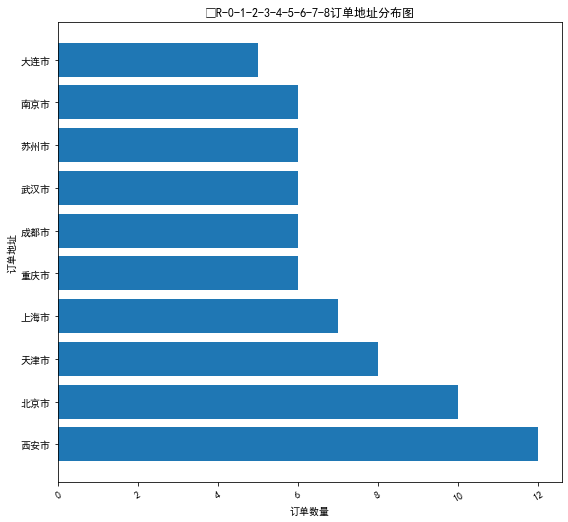

/Users/Jameszhou/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


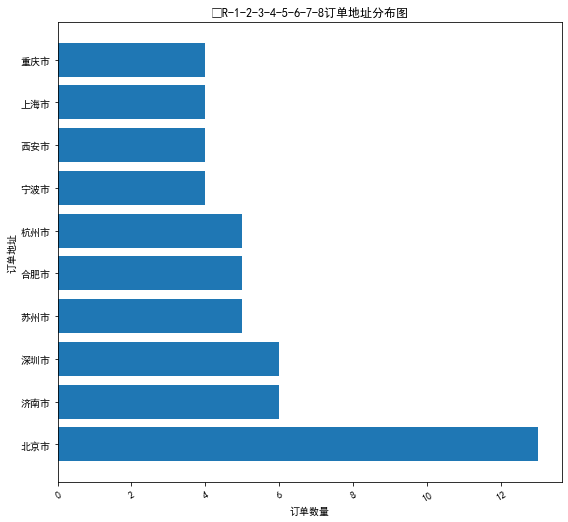

/Users/Jameszhou/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


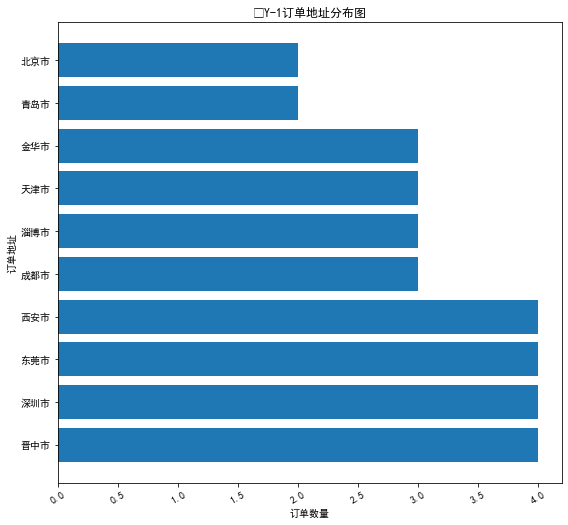

In [17]:
# 设置要分析的SKU型号
sku_list = ['\tR-0-1-2-3-4-5-6-7-8', '\tR-1-2-3-4-5-6-7-8', '\tY-1']

for sku in sku_list:
    # 提取特定SKU型号的订单地址数据
    sku_data = df.loc[df['SKU型号'] == sku]['订单地址']

    # 统计每个订单地址的出现次数
    address_counts = sku_data.value_counts().nlargest(10)

    # 创建一个水平柱状图，展示每个订单地址的出现次数
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.barh(address_counts.index, address_counts.values)

    # 设定图表标题和标签等
    plt.title(f"{sku}订单地址分布图")
    plt.xlabel("订单数量")
    plt.ylabel("订单地址")
    plt.xticks(rotation=30) # x轴标签旋转30度，使其更加紧凑

    # 调整子图间距，以便在图标中显示更多的订单地址
    plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9)

    # 展示图表
    plt.show()